# Convolutional Neural Networks 🥅

---
## Architechure of a Neural network 🚧
1. **Layer 1** : <mark style="background: #D2B3FFA6;">*conv2D*.</mark> : (For convolutional 2 Dimensional Data like Images , with height and width)
2. **Layer 2** : <mark style="background: #FFB86CA6;">Convolutional Layer</mark> () : Extrach and learn most important features from the target images 
3. **Layer 3** : <mark style="background: #FFF3A3A6;">Hidden Activation (ReLu)</mark> : Adds non linearity to learned features (non straight lines )
4. **Layer 4** : <mark style="background: #BBFABBA6;">Pooling Layer </mark>: Reduce the dimensionality of learned images (*Reduces the calculation the CNN has to make )

		Pooling layer: learns from already learned features , like for a example in a car if the learning feature are , like straight line is a hodd , circular lines are wheels , 
		
5. **Layer 5** : <mark style="background: #21D99A;">Fully Connected Layer (Output Layer)</mark> : Further refines the learned features from the convution layers 
6. **Layer 6** : <mark style="background: #ABF7F7A6;">Output activation </mark>( Adds on non linearities to the output layer )

In [1]:
# Get the data : the data is from Food 101 dataset , which is (101 different classes of food  : but there is a modification , here in this dataset , we are working with only 2 classes , PIZZA and STEAK)
# Inspecting the data ===> the data is in the form of images , so we need to load the images and preprocess them
# Visualizing samples of the data 

In [2]:
import os 
# Walk through the pizze_steak directory and list the number of files 
for dirpath, dirnames , filenames in os.walk("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak") :
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in the '{dirpath}'")

There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak'
There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test'
There are 0 directories and 250 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/steak'
There are 0 directories and 250 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/pizza'
There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train'
There are 0 directories and 750 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/steak'
There are 0 directories and 750 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/pizza'


In [3]:
# Visualizing the data
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import tensorflow as tf

# Set up the directory
data_dir = pathlib.Path("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
print(class_names)



['test' 'train']


In [4]:
# Visualizing the sample data

def view_random_image(traget_dir , target_class) :
    # Set up the target directory , (we will view images from here)
    target_folder = traget_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder) , 1)
    #Read an image and plot it using the matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape : {img.shape}")
    return img

Image shape : (384, 512, 3)


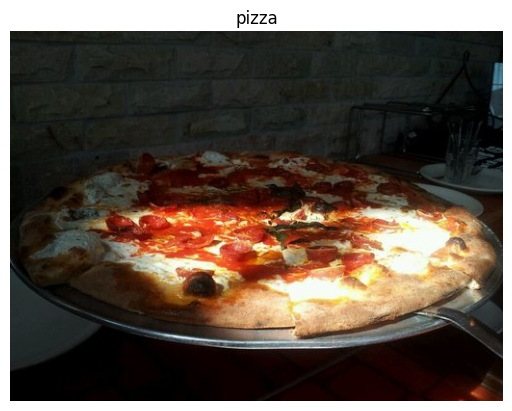

In [5]:
# View thw random image from the pizza directory
img = view_random_image(traget_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/" , target_class = "pizza")

In [6]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[25, 26, 18],
        [24, 25, 17],
        [24, 25, 17],
        ...,
        [12, 17, 13],
        [12, 17, 13],
        [12, 17, 13]],

       [[23, 24, 16],
        [24, 25, 17],
        [25, 26, 18],
        ...,
        [12, 17, 13],
        [12, 17, 13],
        [12, 17, 13]],

       [[23, 24, 18],
        [24, 25, 19],
        [25, 26, 20],
        ...,
        [12, 17, 13],
        [12, 17, 13],
        [12, 17, 13]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [68, 26, 12],
        [66, 24, 10],
        [64, 22,  6]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [69, 26, 10],
        [72, 26, 11],
        [73, 27, 11]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [70, 24,  9],
        [75, 28, 12],
        [79, 32, 16]]], dtype=uint8)>

In [7]:
# When we are reading the images they are in the form of a giant array, or tensor , of different pixel values
# The tensor is a representation of 3 color values , RGB , and the values are between 0 and 255 , if the pixel is blue , the value will be 255 , if the pixel is red , the value will be 0 , if the pixel is green , the value will be 0
# View tge image shape # widht , height , color channels (RGB)

img.shape 

(384, 512, 3)

## Image representation 
 > When we are reading the images they are in the form of a giant array, or tensor , of different pixel values

The tensor is a representation of 3 color values , RGB , and the values are between 0 and 255 , if the pixel is blue , the value will be 255 , if the pixel is red , the value will be 0 , if the pixel is green , the value will be 0

View te image shape width , height , color channels (RGB)

### Preprocessing the data

 The data is in the form of images , we need to convert them into tensors , so that we can use them in the model

Scaling the features == > <mark style="background: #21D99A;">NORMALIZATION</mark>

 convert the pixel values between 0 and 1

In [8]:
# Preprocessing the data
# The data is in the form of images , we need to convert them into tensors , so that we can use them in the model   
# Scaling the features  == > NORMALIZATION 
# convert the pixel values between 0 and 1
img / 255.


array([[[0.09803922, 0.10196078, 0.07058824],
        [0.09411765, 0.09803922, 0.06666667],
        [0.09411765, 0.09803922, 0.06666667],
        ...,
        [0.04705882, 0.06666667, 0.05098039],
        [0.04705882, 0.06666667, 0.05098039],
        [0.04705882, 0.06666667, 0.05098039]],

       [[0.09019608, 0.09411765, 0.0627451 ],
        [0.09411765, 0.09803922, 0.06666667],
        [0.09803922, 0.10196078, 0.07058824],
        ...,
        [0.04705882, 0.06666667, 0.05098039],
        [0.04705882, 0.06666667, 0.05098039],
        [0.04705882, 0.06666667, 0.05098039]],

       [[0.09019608, 0.09411765, 0.07058824],
        [0.09411765, 0.09803922, 0.0745098 ],
        [0.09803922, 0.10196078, 0.07843137],
        ...,
        [0.04705882, 0.06666667, 0.05098039],
        [0.04705882, 0.06666667, 0.05098039],
        [0.04705882, 0.06666667, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

## End to End Model :

- Building a Convolutional Neural network model , to find the <mark style="background: #FFB86CA6;">Patterns</mark> in the images 
	- Load the images
	- Preprocess the images 
	- Build a CNN to find pattern in the images 
	- Compile the CNN
	- Fit the CNN ti the data 


> The imageDataGenerator , will generate the batches of image data ,--> with real time data augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed

tf.random.set_seed(42)

# Preprocessing the data , get all the pixel values between 0 and 1 , Normalizing 
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up path to data directories
train_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/"
test_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/"

# Import the data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                                class_mode = "binary",
                                                 seed = 42 )


valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary",
                                               seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model , (same as tiny VGG)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size= 3,
                           activation = "relu",
                           input_size = (224, 224, 3)),
    tf.keras.layers.Conv2D(10 , 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding= "valid"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = "sigmoid")

])